In [2]:
import os 
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pd.set_option('display.max_columns',None)
pd.options.display.max_seq_items = 2000
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import nltk
import string, itertools
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
inline_rc = dict(mpl.rcParams)

Populating the interactive namespace from numpy and matplotlib


# Loading and Exploring DataSets
#### Exploring YelpBusinessData and analysis of different attributes.
Types of Attributes in Yelp Business Datatypes 

* business_id: ID of the business 
* name: name of the business
* neighborhood 
* address: address of the business
* city: city of the business
* state: state of the business
* postal_code: postal code of the business
* latitude: latitude of the business
* longitude: longitude of the business
* stars: average rating of the business
* review_count: number of reviews received
* is_open: 1 if the business is open, 0 therwise
* categories: multiple categories of the business

Types of attribute in Yelp Data Reviews 

* review_id: ID of the review
* user_id: ID of the user
* business_id: ID of the business
* stars: ratings of the business
* date: review date
* text: review from the user
* useful: number of users who vote a review as usefull
* funny: number of users who vote a review as funny
* cool: number of users who vote a review as cool


In [3]:
YelpDataBaseFolder=os.path.join(os.getcwd(),"YelpData")
#  Edit these Variables and add your json file path here. 
YelpBusinessFile=os.path.join(YelpDataBaseFolder,"business.json")
YelpReviewsFile=os.path.join(YelpDataBaseFolder,"review.json")
YelpUsersFile=os.path.join(YelpDataBaseFolder,"user.json")

In [4]:
def jsonTodfBusiness(YelpBusinessFile):
    users=[]
    with open(YelpBusinessFile,encoding='utf-8') as file:
         for i, line in enumerate(file):
            users.append(json.loads(line))
    df=pd.DataFrame(users)
    df.drop(['attributes','hours'],axis=1,inplace=True)
    return df
    

In [5]:
def jsonTodfUsers(YelpUsersFile):
    users=[]
    with open(YelpUsersFile,encoding='utf-8') as file:
         for i, line in enumerate(file):
            users.append(json.loads(line))
    df=pd.DataFrame(users)
    return df



In [6]:
def jsonTodfReviews(YelpReviewsFile):
    users=[]
    with open(YelpReviewsFile,encoding='utf-8') as file:
         for i, line in enumerate(file):
            users.append(json.loads(line))
    df=pd.DataFrame(users)
    return df

    

### Exploratory Data analysis with Business Data 

In [7]:
#  Read json and convert to df 
BusinessDf=jsonTodfBusiness(YelpBusinessFile)
# print(BusinessDf.columns)
BusinessDf.head()


,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,1,35.4627,-80.8526,The Range At Lake Norman,28031,36,3.5000,NC
1,"8880 E Via Linda, Ste 107",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,1,33.5694,-111.8903,"Carlos Santo, NMD",85258,4,5.0000,AZ
2,3554 Rue Notre-Dame O,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,1,45.4800,-73.5801,Felinus,H4C 1P4,5,5.0000,QC
3,1015 Sharp Cir,6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,0,36.2197,-115.1277,Nevada House of Hose,89030,3,2.5000,NV
4,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ


We now Explore the Business data and different field Types in the csv file.  

In [8]:
#  We check the datatypes and enteries in dataset.  
BusinessDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 12 columns):
address         209393 non-null object
business_id     209393 non-null object
categories      208869 non-null object
city            209393 non-null object
is_open         209393 non-null int64
latitude        209393 non-null float64
longitude       209393 non-null float64
name            209393 non-null object
postal_code     209393 non-null object
review_count    209393 non-null int64
stars           209393 non-null float64
state           209393 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 19.2+ MB


In [9]:
# Observing the central tendencies of the data fields 
BusinessDf.describe()
#  The field of our interest is mainly stars and review_count we see that 
#  average rating is around 3.53 and average reviewcount any business get is around 30.
# Given that we have around 209393  businesses.   

,is_open,latitude,longitude,review_count,stars
count,209393.0000,209393.0000,209393.0000,209393.0000,209393.0000
mean,0.8066,38.5799,-97.3902,36.9375,3.5381
std,0.3949,4.9404,16.7185,123.3436,1.0235
min,0.0000,21.4973,-158.0255,3.0000,1.0000
25%,1.0000,33.6387,-112.2695,4.0000,3.0000
50%,1.0000,36.1474,-111.7435,9.0000,3.5000
75%,1.0000,43.6117,-79.9727,27.0000,4.5000
max,1.0000,51.2999,-72.8066,10129.0000,5.0000


Visualization of different field Types : 

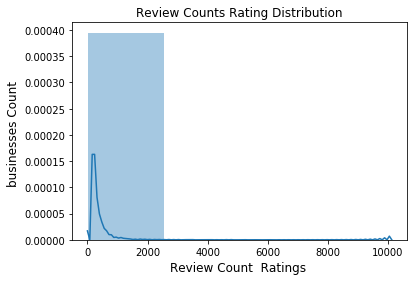

In [10]:
#  Let's visualize Review Counts Distribution. 
dfReviewCounts=BusinessDf['review_count']
# # plotting the review count Distribution: 

plt.figure()
ax= sns.distplot(dfReviewCounts,bins=4)
plt.title("Review Counts Rating Distribution")
plt.ylabel('businesses Count ', fontsize=12)
plt.xlabel('Review Count  Ratings ', fontsize=12)
plt.savefig('review_count.png')
plt.show()
# We see that review counts is not very uniform mostly concentrated nearabout 1000 range. 

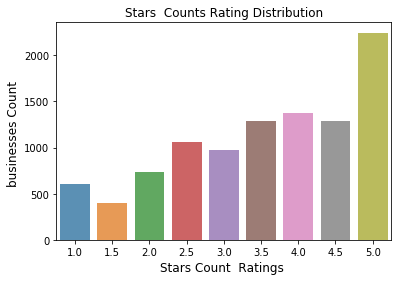

In [26]:
#  Let's visualize Rating Counts Distribution. 
dfStarsCounts=BusinessDf['stars'].value_counts()
dfStarsCounts=dfStarsCounts.sort_index()
# # plotting the review count Distribution: 

plt.figure()
ax= sns.barplot(dfStarsCounts.index,dfStarsCounts.values,alpha=0.8)
plt.title("Stars  Counts Rating Distribution")
plt.ylabel('businesses Count ', fontsize=12)
plt.xlabel('Stars Count  Ratings ', fontsize=12)
plt.savefig('star_count.png')
plt.show()
# We see that Star  counts tends to form somewhat similar to a skewed gaussian where we see the peak is around 3.5-4 and then it decreases. 

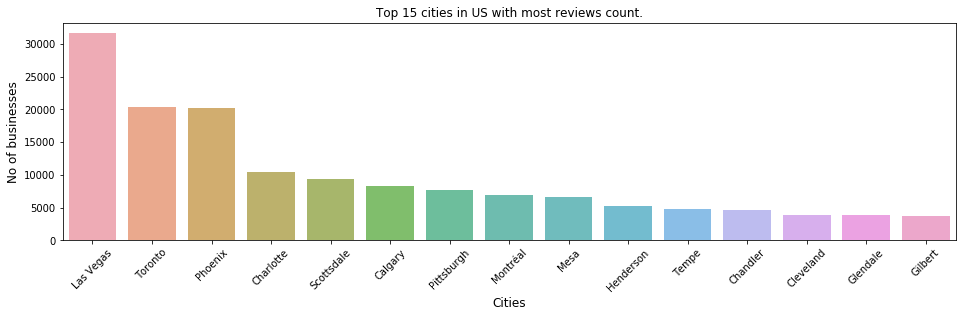

In [12]:
# Visualization of review counts per city  (Top 15 cities)
dfCity=BusinessDf['city'].value_counts().sort_values(ascending=False)
dfCity=dfCity.iloc[0:15]
plt.figure(figsize=(16,4))
ax = sns.barplot(dfCity.index, dfCity.values, alpha=0.8)
plt.title("Top 15 cities in US with most reviews count.")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('No of businesses', fontsize=12)
plt.xlabel('Cities', fontsize=12)
plt.savefig("Cities_vs_ReviewCount.png")
plt.show()
# Las Vegas is sure the most active cities(Happening) when it comes to reviews followed by Pheonix and Toronto.

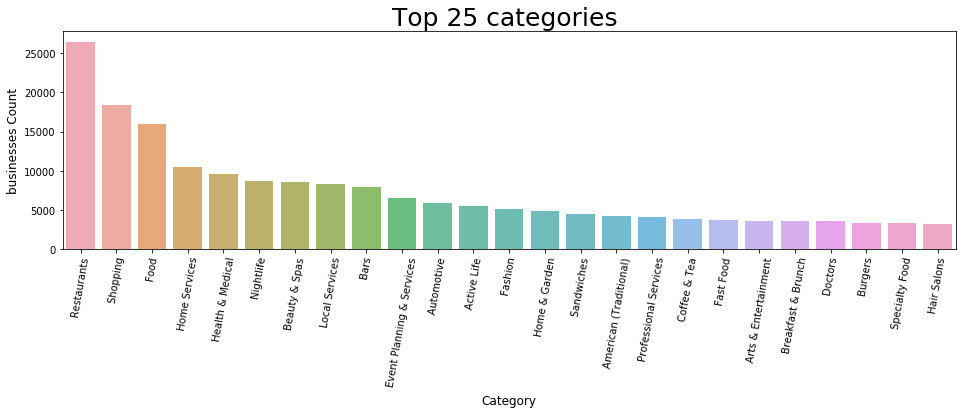

In [13]:
#  Now we look at the types of categrories of businesses. 
category = ''.join(BusinessDf['categories'].astype('str'))
CategoryDf=pd.DataFrame(category.split(','),columns=['categories'])
CategoryDf=CategoryDf.categories.value_counts().sort_values(ascending=False)
# Selecting Top 25 categories.  

CategoryDf=CategoryDf.iloc[0:25]
plt.figure(figsize=(16,4))

ax = sns.barplot(CategoryDf.index, CategoryDf.values, alpha=0.8)
plt.title("Top 25 categories ",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('businesses Count', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.savefig("Category_plot.png")
plt.show()


### Explotary Analysis of Reviews Data

Loading Database in pandas and exploring and visualizing it.

In [14]:
ReviewsDf=jsonTodfReviews(YelpReviewsFile)

In [15]:
ReviewsDf.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,-MhfebM0QIsKt87iDN-FNw,0,2015-04-15 05:21:16,0,xQY8N_XvtGbearJ5X4QryQ,2.0000,"As someone who has worked with many museums, I...",5,OwjRMXRC0KyPrIlcjaXeFQ
1,lbrU8StCq3yDfr-QMnGrmQ,0,2013-12-07 03:16:52,1,UmFMZ8PyXZTY2QcwzsfQYA,1.0000,I am actually horrified this place is still in...,1,nIJD_7ZXHq-FX8byPMOkMQ
2,HQl28KMwrEKHqhFrrDqVNQ,0,2015-12-05 03:18:11,0,LG2ZaYiOgpr2DK_90pYjNw,5.0000,I love Deagan's. I do. I really do. The atmosp...,1,V34qejxNsCbcgD8C0HVk-Q
3,5JxlZaqCnk1MnbgRirs40Q,0,2011-05-27 05:30:52,0,i6g_oA9Yf9Y31qt0wibXpw,1.0000,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,ofKDkJKXSKZXu5xJNGiiBQ
4,IS4cv902ykd8wj1TR0N3-A,0,2017-01-14 21:56:57,0,6TdNDKywdbjoTkizeMce8A,4.0000,"Oh happy day, finally have a Canes near my cas...",0,UgMW8bLE0QMJDCkQ1Ax5Mg


In [16]:
# Let's explore more about this data set starting with features types.
ReviewsDf.info()
#  There are total 8021122   entries. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          float64
text           object
useful         int64
user_id        object
dtypes: float64(1), int64(3), object(5)
memory usage: 550.8+ MB


In [17]:
# Let's see how many unique business Id we have 
# ReviewsDf["business_id"].value_counts()
# 209393 same as Business Data csv file.

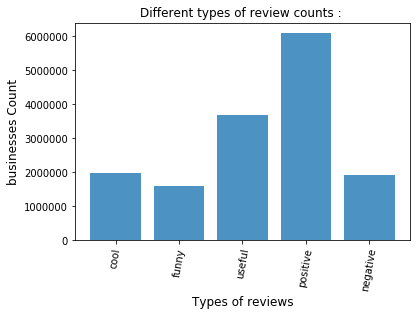

In [18]:
# Let's checkout the distribution of types of reviews
#  we define a initial criteria  if the star rating is above 3 the review is positive or else negative 
coolReviews=len(ReviewsDf[ReviewsDf["cool"]>0])
funnyReviews=len(ReviewsDf[ReviewsDf["funny"]>0])
usefulReviews=len(ReviewsDf[ReviewsDf["useful"]>0])
positiveReviews=len(ReviewsDf[ReviewsDf["stars"]>=3])
negativeReviews=len(ReviewsDf[ReviewsDf["stars"]<2.5])
counts=[coolReviews,funnyReviews,usefulReviews,positiveReviews,negativeReviews]
index=["cool","funny","useful","positive","negative"]
plt.figure()
ax = plt.bar(index, counts, alpha=0.8)
plt.title("Different types of review counts : ",fontsize=12)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('businesses Count', fontsize=12)
plt.xlabel('Types of reviews', fontsize=12)
plt.savefig("reviewTypes_plot.png")
plt.show()

#  We see we have high no of reviews as positive as per our initial analysis. 

### Filtering and Cleaning Data 
As we have seen there are different types of categories of business in yelp dataSet. There are product based buisnesses and service based businesses . Our particular area of interest is on Service based businesses we will pick 
* Home Service
* Local Services 
* Home and Garden 
And do further analysis of how reviews impact their businesses. 

In [19]:
#  Cleaning and filtering BusinessDf and ReviewsDf.
def cleanDatabase(BusinessDf,ReviewsDf):
#     keeping only useful columns 
#     BusinessDf.drop(['neighborhood'],axis=1,inplace=True)
#     converting json type string to normal strings 
    BusinessDf.name=BusinessDf.name.str.replace('"',"")
    BusinessDf.address=BusinessDf.address.str.replace('"',"")
    BusinessDf['categories'].dropna(inplace=True)
    return BusinessDf,ReviewsDf

In [20]:
BusinessDf,ReviewsDf=cleanDatabase(BusinessDf,ReviewsDf)
BusinessDf.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,1,35.4627,-80.8526,The Range At Lake Norman,28031,36,3.5000,NC
1,"8880 E Via Linda, Ste 107",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,1,33.5694,-111.8903,"Carlos Santo, NMD",85258,4,5.0000,AZ
2,3554 Rue Notre-Dame O,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,1,45.4800,-73.5801,Felinus,H4C 1P4,5,5.0000,QC
3,1015 Sharp Cir,6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,0,36.2197,-115.1277,Nevada House of Hose,89030,3,2.5000,NV
4,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ


In [21]:
# Filter Data based on Us states 
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
      "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
      "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
      "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
      "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
BusinessDf=BusinessDf.loc[BusinessDf['state'].isin(states)]
BusinessDf.head()


,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,1,35.4627,-80.8526,The Range At Lake Norman,28031,36,3.5000,NC
1,"8880 E Via Linda, Ste 107",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,1,33.5694,-111.8903,"Carlos Santo, NMD",85258,4,5.0000,AZ
3,1015 Sharp Cir,6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,0,36.2197,-115.1277,Nevada House of Hose,89030,3,2.5000,NV
4,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ
5,"1720 W Elliot Rd, Ste 105",cKyLV5oWZJ2NudWgqs8VZw,"Auto Repair, Automotive, Oil Change Stations, ...",Gilbert,1,33.3504,-111.8271,Oasis Auto Center - Gilbert,85233,38,4.5000,AZ


In [22]:
def filterCategory(BusinessDf):
    list_data=list(BusinessDf.values)
    filter_columns=BusinessDf.columns
    filter_data=[]
    for i in range(len(list_data)):
        try:
            categorylist=list_data[i][2].split(',')
        #     print(categorylist)
            if "Home Services" in categorylist:
                list_data[i][2]="Home Services"
                filter_data.append(list_data[i])
            elif "Local Services" in categorylist:
                list_data[i][2]="Local Services"
                filter_data.append(list_data[i])
            elif "Home & Garden" in categorylist:
                list_data[i][2]="Home & Garden"
                filter_data.append(list_data[i])
        except:
            ignore=0

    df_business=pd.DataFrame(filter_data,columns=filter_columns)
    return df_business
    

In [23]:
BusinessDf=filterCategory(BusinessDf)
BusinessDf.head()


,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ
1,2402 Atchley Dr,rqcOZePlVvJP9EtzldIz0w,Local Services,Henderson,0,35.9520,-115.0935,Desert Storage,89052,5,5.0000,NV
2,,UiyjUa8CQmygujhe-ZYlsw,Home Services,Champaign,1,40.1270,-88.2417,Movers 4 Less Inc,61822,15,3.0000,IL
3,3950 W Chandler Blvd,bBhbxPjxDZSYVD-3tjUwnw,Home Services,Chandler,0,33.3061,-111.9094,Jefferson Chandler by Alliance,85226,10,3.0000,AZ
4,"17060 N Thompson Peak Pkwy, Ste 125",Nia-bZ6YB2zIdz8kSHTASQ,Local Services,Scottsdale,0,33.6409,-111.8618,Viking Cleaners,85255,3,3.0000,AZ


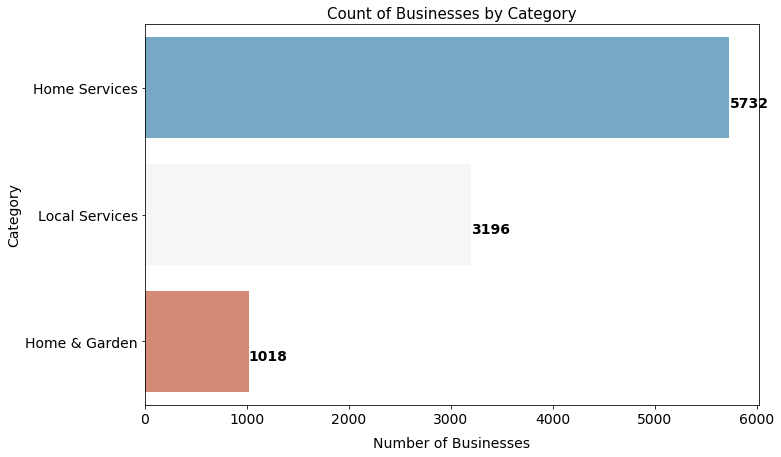

In [24]:
# Lets explore our Filtered Data
plt.figure(figsize=(11,7))
datacat = BusinessDf.categories.value_counts()
sns.countplot(y='categories',data=BusinessDf,order = datacat.index, palette= sns.color_palette("RdBu_r", len(datacat)))
plt.xlabel('Number of Businesses', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Businesses by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(BusinessDf.categories.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)
plt.savefig("CategoryFilterData.png")
# We have about 5732 home services and 3196 local services and about 1018 home and garden to perform analysis on. 

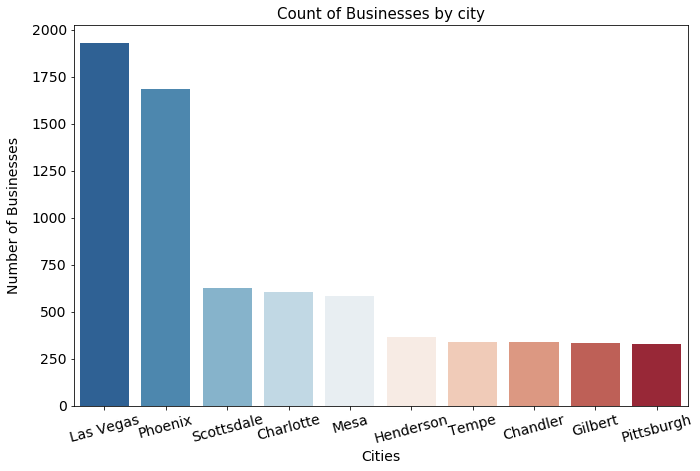

In [25]:
#  Let's explore the cities which provide these services
plt.figure(figsize=(11,7))
datacity = BusinessDf.city.value_counts()[:10]
sns.barplot(datacity.index,datacity.values, palette= sns.color_palette("RdBu_r", len(datacity)))
plt.ylabel('Number of Businesses', fontsize=14, labelpad=10)
plt.xlabel('Cities', fontsize=14)
plt.title('Count of Businesses by city', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
plt.savefig("CityBusinessCount.png")
plt.show()

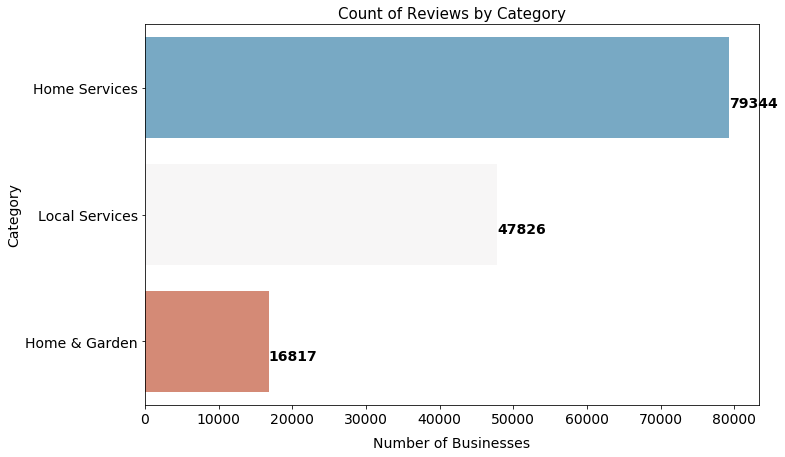

In [26]:
# Let's view the review Count of these category. 
plt.figure(figsize=(11,7))
datacat = BusinessDf.groupby('categories')['review_count'].sum().sort_values(ascending=False)
sns.barplot(y=datacat.index,x=datacat.values ,palette= sns.color_palette("RdBu_r", len(datacat)))
plt.xlabel('Number of Businesses', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Reviews by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(datacat):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)
plt.savefig("CategoryReviewsData.png")
# Maximum reviews we get from home services. 

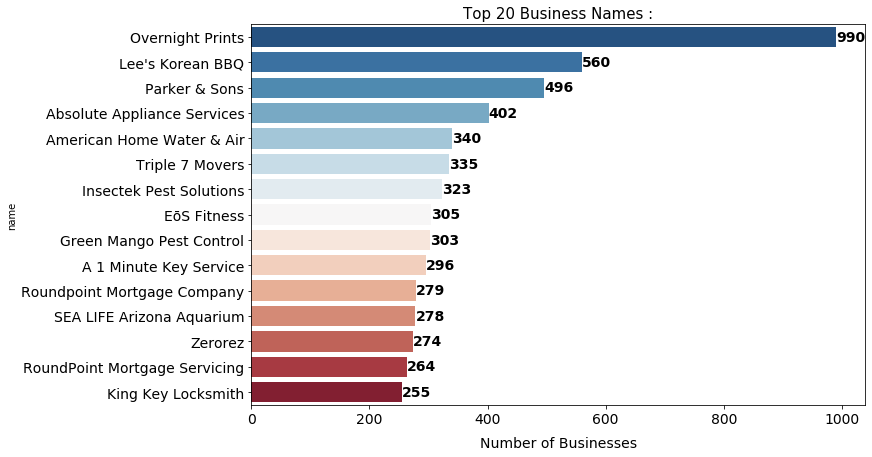

In [27]:
# Let's look at top 15 business names in all category to recieve the most reviews
plt.figure(figsize=(11,7))
datacat = BusinessDf[['name','review_count']].sort_values(by='review_count',ascending=False)[:15]
sns.barplot(x=datacat.review_count,y=datacat.name ,palette= sns.color_palette("RdBu_r", len(datacat)),ci=None)
plt.xlabel('Number of Businesses', fontsize=14, labelpad=10)
plt.title('Top 20 Business Names :', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(datacat.review_count):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)
plt.savefig("TopBusinessData.png")


In [28]:
#  Displaying sub services in all categories 
def filterSubService(BusinessDf,category):
    list_category=list(BusinessDf[BusinessDf["categories"]==category]["name"].values)
    sub_service_list=[]
    for i in range(len(list_category)):
        if "service" in (list_category[i].strip().lower()):
            sub_service_list.append(list_category[i])
        if "services" in (list_category[i].strip().lower()):    
            sub_service_list.append(list_category[i])
    return sub_service_list

In [29]:
def plotSubservice(subcatlist,category):
    plt.figure(figsize=(11,7))
    df_temp=pd.DataFrame(subcatlist,columns=['Service'])
    dataservice = df_temp.Service.value_counts()[:10]
#     print(dataservice)
    sns.barplot(dataservice.index,dataservice.values, palette= sns.color_palette("RdBu_r", len(dataservice)))
    plt.title("Sub Services in {} ".format(category))
    plt.xticks(rotation=35)

    

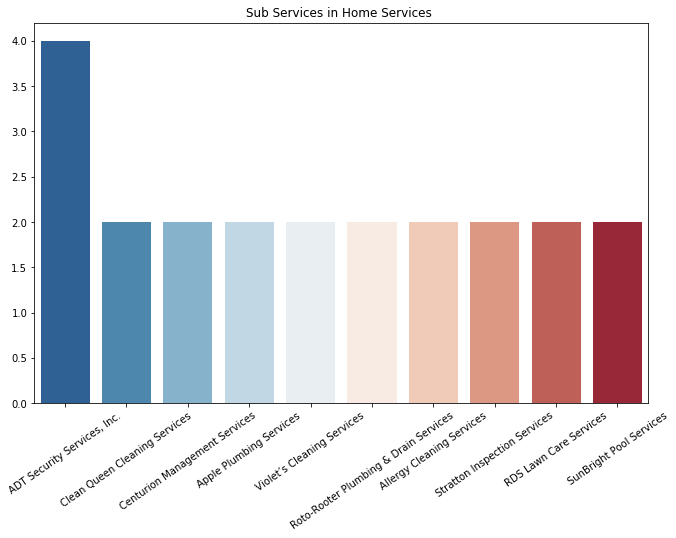

In [30]:
subserviceHome=filterSubService(BusinessDf,"Home Services")
subserviceLocal=filterSubService(BusinessDf,"Local Services")
subserviceGarden=filterSubService(BusinessDf,"Home & Garden")
plotSubservice(subserviceHome,"Home Services")


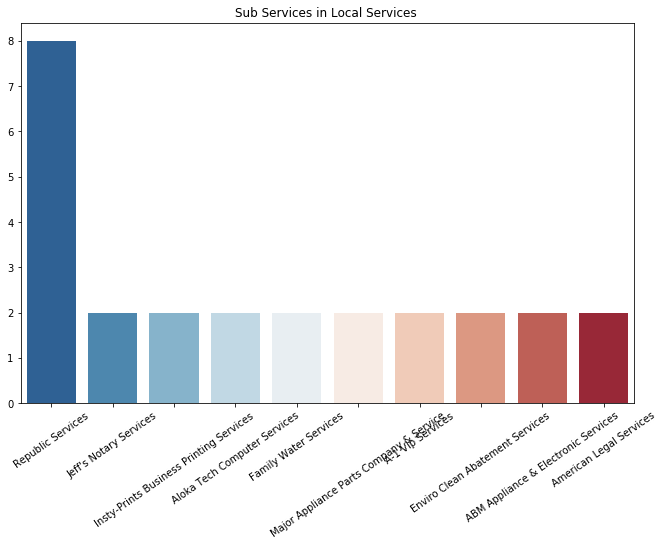

In [31]:
subserviceLocal=filterSubService(BusinessDf,"Local Services")
plotSubservice(subserviceLocal,"Local Services")


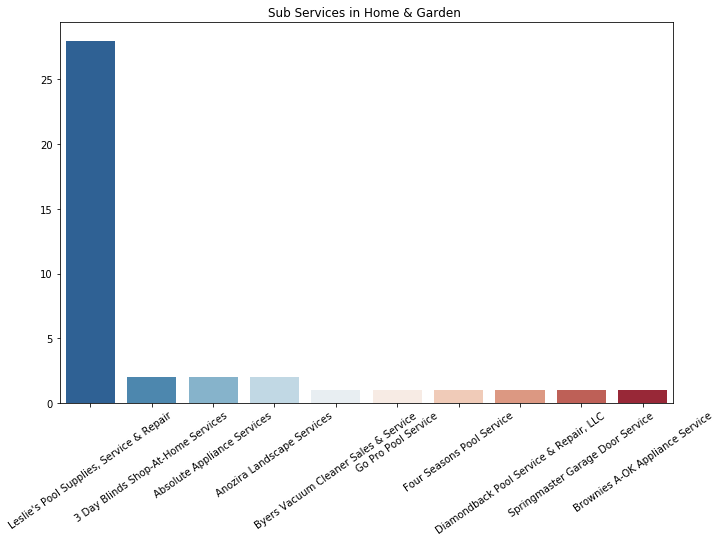

In [32]:
subserviceGarden=filterSubService(BusinessDf,"Home & Garden")
plotSubservice(subserviceGarden,"Home & Garden")


In [33]:
def plotcategorybyState(df_category,category):
    list_category=BusinessDf[BusinessDf["categories"]==category]
    dataservice = list_category.state.value_counts()
#     print(dataservice)
    sns.barplot(dataservice.index,dataservice.values, palette= sns.color_palette("RdBu_r", len(dataservice)))
    plt.title("Sub Services in {} ".format(category))
    plt.xticks(rotation=15)

    
    

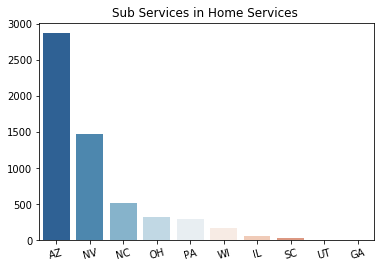

In [34]:
#  Home service 
plotcategorybyState(BusinessDf,"Home Services")

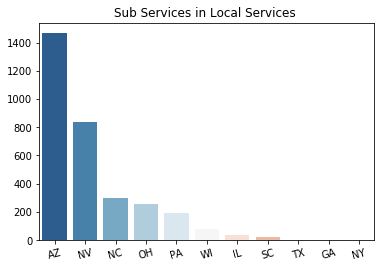

In [35]:
# Local Services 
plotcategorybyState(BusinessDf,"Local Services")

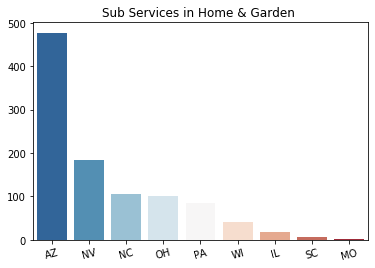

In [36]:
# Home and Garden 
plotcategorybyState(BusinessDf,"Home & Garden")

#### Merging The two Datasets and Performing Further analysis 
We will merge the two dataset and began to perform our machine learning task and figure out what type of reviews are positive and negative. 

In [37]:
#  We will name the merged df to be YelpDf
YelpDf =pd.merge(BusinessDf,ReviewsDf,on="business_id")
# handle conficting column names 
YelpDf.rename(columns={"stars_x":"avg_stars","stars_y":"review_star"},inplace=True)
# Adding the length of words of reviews 
YelpDf['num_words_review'] = YelpDf.text.str.replace('\n','').str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))


In [38]:
#  Adding label for positive and negative reviews 
YelpDf['labels'] = ''
YelpDf.loc[YelpDf.review_star >=4, 'labels'] = 'positive'
YelpDf.loc[YelpDf.review_star ==3, 'labels'] = 'neutral'
YelpDf.loc[YelpDf.review_star <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
YelpDf.drop(YelpDf[YelpDf['labels'] =='neutral'].index, axis=0, inplace=True)
YelpDf.reset_index(drop=True, inplace=True)
YelpDf.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,avg_stars,state,cool,date,funny,review_id,review_star,text,useful,user_id,num_words_review,labels
0,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2016-01-30 03:26:19,1,EY8t3ndAZo2vWY7eeOnVLw,5.0000,UMGS does an amazing job serving the community...,0,nKBtfZ93gPYybGEz2QOvTQ,22,positive
1,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2016-03-02 20:15:09,0,uoujAVvyx-GLyQnByuon0w,5.0000,I called Connie needing some stuff done on a S...,0,UjVtviHTm2mgZnXCfl33CQ,99,positive
2,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2017-06-07 18:24:25,0,pECK3p9w7m-_xEp--lGxHg,5.0000,We are selling our home and needed our back fa...,0,L498DJb5YDAtoqgv9thWCg,58,positive
3,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2015-09-02 06:17:47,0,cMElQgyBrFbS2jDz3dDqpA,5.0000,Great service!!! Extremely courteous and frie...,0,KQ5XRSIeuzh8JuFyo7GXQA,11,positive
4,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2015-08-31 18:00:19,0,_B3aFVKSJeY57Tr4hVmeJA,5.0000,The Best! When we moved into a new home three ...,1,U_FfJTKoLsutJf-r98H9EA,66,positive


In [39]:
#  Analysis of Positive and negative reviews 
# Creating Pivot tables and calculating percentages for positive and negative 
table = pd.pivot_table(YelpDf, values=["review_id"], index=["categories"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
table_percentage

categories
Home & Garden    0.7009
Local Services   0.6930
Home Services    0.6313
Name: (review_id, positive), dtype: float64

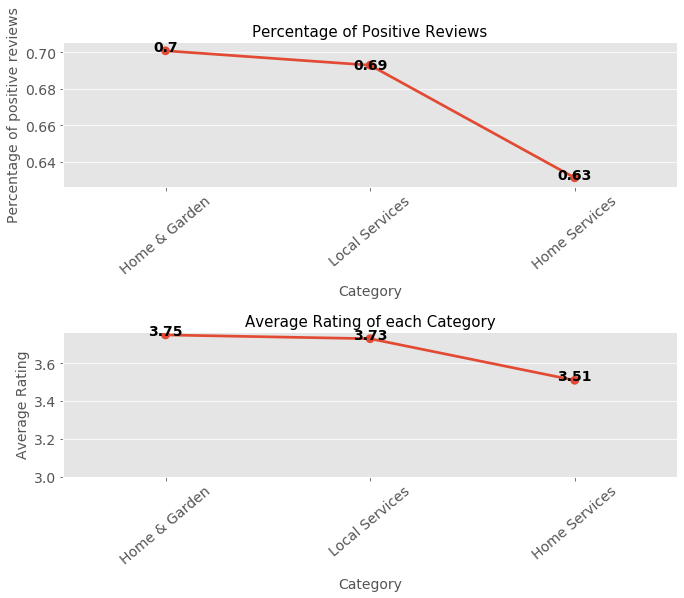

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplot(212)
grouped = YelpDf.groupby('categories')['review_star'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Category', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)
plt.savefig("Percentage_Graph.png")
# We see that Most positive reviews are recieved by Home and Garden services whereas Home Services  has recieved less positive recievews upon 
# further analysis we will get to know what we can be done to benefit these business. An interesting graph for average rating for each category average rating for all businesses is above 3.5 that means 
# Businesses are doing good.

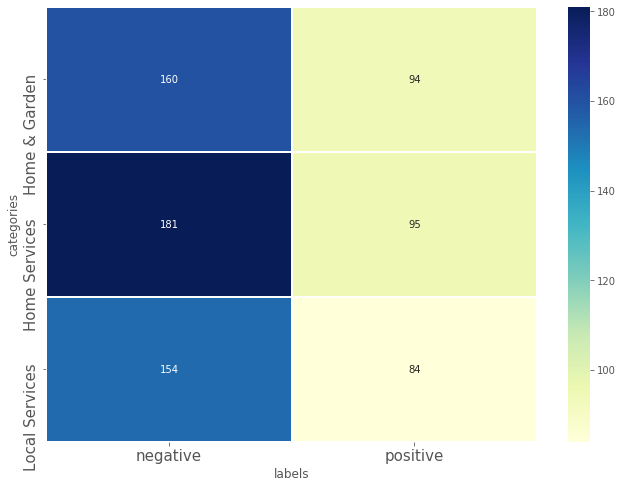

In [41]:
#  Now we explore the Heat Map which shows the average length of words used for reviews.
table = YelpDf.groupby(['categories','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='YlGnBu', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)
plt.savefig("Heat_map.png")
# As per the graph we can see people express their negative reviews with more length. 

### Reviews analysis using NLP and LinearSVC
In this section we will load in most used negative words and positive words and do our further analysis. 

In [42]:
#  This section Cleans the text of reviews.
# convert all text to lowercase it helps in search and text comparing.
YelpDf.text=YelpDf.text.str.lower()
#  removing characters which are not used in any analysis such as punchtuation chars etc.
YelpDf["clean_text"]=YelpDf.text.str.replace('\n','').str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')


In [43]:
def loadNegativePositiveWords():
    positivefilereader=csv.reader(open("positive.txt"))
    positivewords=[line[0] for line in positivefilereader]
    negativefilereader=csv.reader(open("negative.txt"))
    negativewords=[line[0] for line in negativefilereader]
    return positivewords,negativewords

In [44]:
positivewords,negativewords=loadNegativePositiveWords()

In [45]:
#  filter data set by category (Home service etc)
def filter_dataset_category(category):
    df = YelpDf[['clean_text','labels']][YelpDf.categories==category]
    df.reset_index(drop=True, inplace =True)
    df.rename(columns={'clean_text':'text'}, inplace=True)
    return df
# filter out negative and positive words 
def filterwords(review):
    words = [word for word in review.split() if word in positivewords + negativewords]
    words = ' '.join(words)
    return words
def filterwords(df_train):
    totalwords=positivewords+negativewords
    new_list=[]
    list_val=list(df_train.values)
    for row in list_val:
        review_list=row[0].split()
        word_list=[]
        for word in review_list:
            if word in totalwords:
                word_list.append(word)
#             print(word)
#         print(" ".join(word_list))
        row[0]=" ".join(word_list)
        new_list.append(row)
    df_train_new=pd.DataFrame(new_list,columns=df_train.columns)
    return df_train_new
            
#  function to split data 
def split_data(dataset, test_size):
    df_train, df_test = train_test_split(dataset[['text','labels']],test_size=test_size)
    return df_train


In [46]:
def polarity_score(dataset):
    dataset=filterwords(dataset)
#     selecting features 
    terms_train=list(dataset['text'])
    class_train=list(dataset['labels'])
#     print(len(terms_train))
#     creating  bag of words 
    vectorizer = CountVectorizer()
    feature_train_counts=vectorizer.fit_transform(terms_train)
#     print(feature_train_counts.shape)
# Model run
# Now we create Linear Svc model  (Support Vector Machine) this is used to differentiate between Positive and Negative reviews 
# and we calculate word score (polarity Score) using Svc.
    svmModel=LinearSVC()
    svmModel.fit(feature_train_counts,class_train)
    scoreDict={'score':svmModel.coef_[0],'word':vectorizer.get_feature_names()}
    service_word_score=pd.DataFrame(scoreDict)
#     print(len(service_word_score))
#     frequency of each word in all reviews in a specific category 
    service_reviews=pd.DataFrame(feature_train_counts.toarray(),columns=vectorizer.get_feature_names())
    service_reviews['labels']=class_train
    service_frequency=service_reviews[service_reviews['labels']=='positive'].sum()[:-1]
    service_word_score.set_index('word',inplace=True)
    service_polarity_score=service_word_score
    service_polarity_score['frequency']=service_frequency
    
#     changing the datatypes 
    service_polarity_score.score=service_polarity_score.score.astype(float)
    service_polarity_score.frequency=service_polarity_score.frequency.astype(float)
#     calculating polarity score 
    service_polarity_score['polarity']=(service_polarity_score.score*service_polarity_score.frequency)/service_reviews.shape[0]
#     we will filter some common words which have high polarity and are obvious removing them will give us some more words which can tell the 
#     actual positive and negative impact. 
    discard_positive_words = ['great','amazing','love','best','awesome','excellent','good',
                                                   'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']
    discard_negative_words =  ['bad','work','disappointed','helping','unfortunately','disappointing','horrible',
                                                    'lacking','terrible','sorry','properly','available']
    discard_words = discard_positive_words + discard_negative_words
    
    service_polarity_score.drop(service_polarity_score.loc[discard_words].index,axis=0,inplace=True)
    
    return service_polarity_score

    

    
    

In [47]:
def plotWords(top_words,category):
    plt.figure(figsize=(11,6))
    colors = ['red' if c < 0 else 'blue' for c in top_words.values]
    sns.barplot(y=top_words.index, x=top_words.values, palette=colors)
    plt.xlabel('Polarity Score', labelpad=10, fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.title('TOP 10 Positive and Negative Words in %s Service ' % category, fontsize=15)
    plt.tick_params(labelsize=14)
    plt.xticks(rotation=15)

In [48]:
def get_top_words(dataset, label, number=20):
    if label == 'positive':
        df = dataset[dataset.polarity>0].sort_values('polarity',ascending = False)[:number]
    else:
        df = dataset[dataset.polarity<0].sort_values('polarity')[:number]
    return df

#### Home Service Analysis 


In [49]:
home_service_reviews=filter_dataset_category('Home Services')
# split ratio is 0.9 
home_train=split_data(home_service_reviews,0.9)


In [50]:
# Polarity scores for Home service 
home_service_polarity_score=polarity_score(home_train)

In [51]:
home_service_top_positivewords=get_top_words(home_service_polarity_score,'positive')
home_service_top_positivewords


,score,frequency,polarity
word,,,
friendly,0.8059,794.0000,0.0782
recommend,0.3840,1655.0000,0.0777
thank,0.5159,614.0000,0.0387
efficient,1.0199,304.0000,0.0379
reasonable,0.7099,399.0000,0.0346
honest,0.6894,396.0000,0.0334
knowledgeable,0.6737,362.0000,0.0298
helpful,0.4195,431.0000,0.0221
prompt,0.9672,186.0000,0.0220


In [52]:
home_service_top_negativewords=get_top_words(home_service_polarity_score,'negative')
home_service_top_negativewords

,score,frequency,polarity
word,,,
complex,-0.4280,177.0000,-0.0093
broken,-0.3118,107.0000,-0.0041
negative,-0.5817,54.0000,-0.0038
cheap,-0.7956,31.0000,-0.0030
lost,-0.5768,42.0000,-0.0030
expensive,-0.3108,75.0000,-0.0029
waste,-0.6397,32.0000,-0.0025
damage,-0.1869,101.0000,-0.0023
lack,-0.8308,22.0000,-0.0022


In [53]:
home_service_positivewords=list(home_service_top_positivewords.index[:15])
home_service_negativewords=list(home_service_top_negativewords.index[:15])
# home_service_positivewords
home_service_topwords=home_service_polarity_score.loc[home_service_positivewords+home_service_negativewords,'polarity']


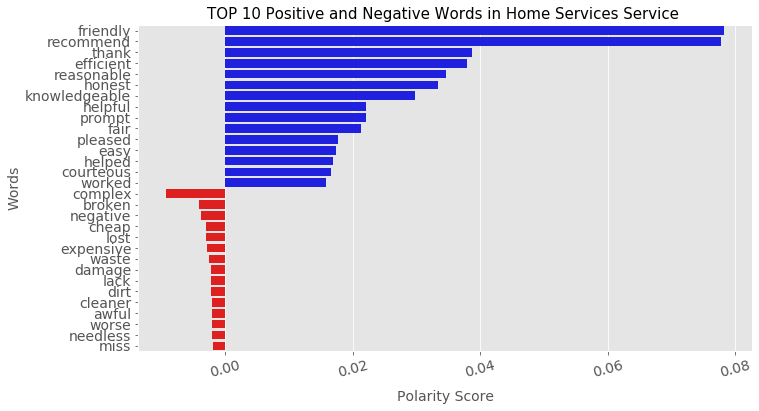

In [54]:
# We plot the words againts polarity score to get more insight.
plotWords(home_service_topwords,'Home Services')

#### Local Services Analysis 

In [55]:
local_service_reviews=filter_dataset_category('Local Services')
# split ratio is 0.9 
local_train=split_data(local_service_reviews,0.9)


In [56]:
# Polarity scores for local service 
local_service_polarity_score=polarity_score(local_train)

In [57]:
local_service_top_positivewords=get_top_words(local_service_polarity_score,'positive')
local_service_top_positivewords

,score,frequency,polarity
word,,,
helpful,0.5873,417.0000,0.0508
thank,0.5995,368.0000,0.0458
reasonable,0.7337,249.0000,0.0379
friendly,0.2521,622.0000,0.0325
knowledgeable,0.8518,181.0000,0.0320
recommend,0.1627,773.0000,0.0261
pleased,0.8827,114.0000,0.0209
fast,0.4297,231.0000,0.0206
courteous,0.6612,130.0000,0.0178


In [58]:
local_service_top_negativewords=get_top_words(local_service_polarity_score,'negative')
local_service_top_negativewords

,score,frequency,polarity
word,,,
expensive,-0.2316,70.0000,-0.0034
clearly,-0.6173,25.0000,-0.0032
desert,-0.6052,24.0000,-0.0030
wrong,-0.2950,46.0000,-0.0028
worst,-1.0328,12.0000,-0.0026
cheaper,-0.4322,28.0000,-0.0025
modern,-0.8329,14.0000,-0.0024
rude,-1.2864,9.0000,-0.0024
broke,-0.2783,41.0000,-0.0024


In [59]:
local_service_positivewords=list(local_service_top_positivewords.index[:15])
local_service_negativewords=list(local_service_top_negativewords.index[:15])
# local_service_positivewords
local_service_topwords=local_service_polarity_score.loc[local_service_positivewords+local_service_negativewords,'polarity']


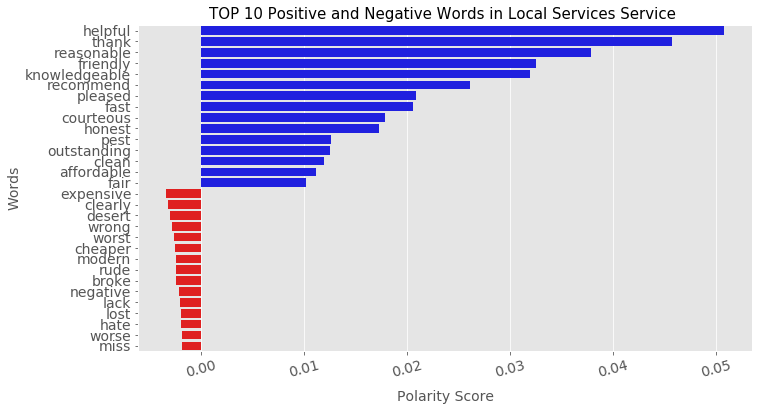

In [60]:
# We plot the words againts polarity score to get more insight.
plotWords(local_service_topwords,'Local Services')

#### Home and Garden analysis 

In [61]:
garden_service_reviews=filter_dataset_category('Local Services')
# split ratio is 0.9 
garden_train=split_data(garden_service_reviews,0.9)


In [62]:
# Polarity scores for Garden service 
garden_service_polarity_score=polarity_score(garden_train)

In [63]:
garden_service_top_positivewords=get_top_words(garden_service_polarity_score,'positive')
garden_service_top_positivewords

,score,frequency,polarity
word,,,
recommend,0.4264,793.0000,0.0702
friendly,0.4268,613.0000,0.0543
thank,0.5377,341.0000,0.0381
knowledgeable,0.9501,191.0000,0.0377
helpful,0.4986,363.0000,0.0376
efficient,0.9323,152.0000,0.0294
reasonable,0.6124,217.0000,0.0276
easy,0.6848,188.0000,0.0267
fair,0.8231,148.0000,0.0253


In [64]:
garden_service_top_negativewords=get_top_words(garden_service_polarity_score,'negative')
garden_service_top_negativewords

,score,frequency,polarity
word,,,
expensive,-0.2907,63.0000,-0.0038
lost,-0.5105,34.0000,-0.0036
luck,-0.8054,18.0000,-0.0030
wow,-0.4908,27.0000,-0.0028
wrong,-0.3639,36.0000,-0.0027
poor,-0.9689,13.0000,-0.0026
problem,-0.0423,293.0000,-0.0026
cracked,-0.3616,30.0000,-0.0023
trash,-0.6607,16.0000,-0.0022


In [65]:
garden_service_positivewords=list(garden_service_top_positivewords.index[:15])
garden_service_negativewords=list(garden_service_top_negativewords.index[:15])
# garden_service_positivewords
garden_service_topwords=garden_service_polarity_score.loc[garden_service_positivewords+garden_service_negativewords,'polarity']
# garden_service_topwords

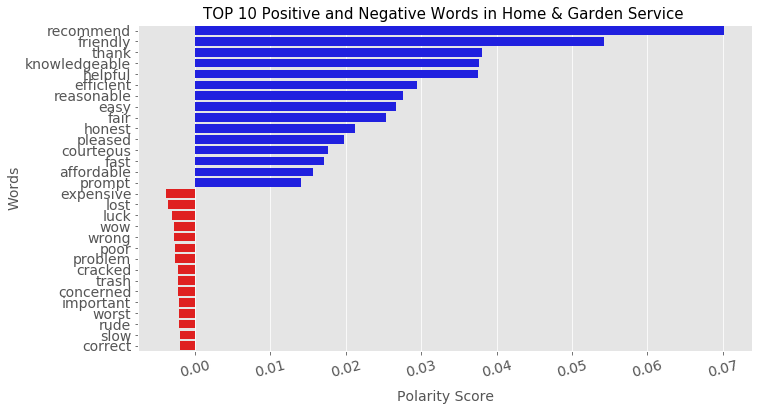

In [66]:
# We plot the words againts polarity score to get more insight.
plotWords(garden_service_topwords,'Home & Garden')

In [67]:
# Loading User Json file 
yelpUserDf=jsonTodfUsers(YelpUsersFile)

In [68]:
yelpUserDf.head()
#  Displaying the yelp Users Df.

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.5700,22,0,22,3,1,2,11,0,15,1,10,227,,14,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",225,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,2007-07-06 03:27:11
1,3.8400,63,2,63,36,1,4,33,5,37,5,21,400,"2008,2009,2010,2011,2012,2013",27,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",316,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,2008-04-28 01:29:25
2,3.4400,17,1,17,9,0,6,3,1,7,0,4,103,2010,5,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",125,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,2008-08-28 23:40:05
3,3.0800,7,0,7,2,0,1,7,0,14,0,2,84,2009,6,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",160,John,206,233,QaELAmRcDc5TfJEylaaP8g,2008-09-20 00:08:14
4,4.3700,31,1,31,8,1,9,22,31,28,2,19,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018",78,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",400,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,2008-08-09 00:30:27


In [69]:
yelpUserDf.describe()
# Displaying the attributes for users with mean max and min.

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
count,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000,1968703.0000
mean,3.6481,2.8192,0.1614,2.8192,1.9804,0.0702,0.3004,1.3725,1.1147,2.8500,0.1873,1.0584,21.7080,1.4588,17.0344,22.1693,39.8271
std,1.1725,86.5150,11.6210,86.5150,72.2908,9.9679,12.7531,58.8253,92.2661,96.9446,15.0750,31.5489,445.7187,16.6752,355.0568,76.7423,513.3536
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000
50%,3.8800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,3.0000
75%,4.5700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0000,3.0000,15.0000,13.0000
max,5.0000,40508.0000,13654.0000,40508.0000,25452.0000,12669.0000,13501.0000,58480.0000,82622.0000,72370.0000,14179.0000,15445.0000,191359.0000,11568.0000,165861.0000,14455.0000,197130.0000


In [70]:
#  Merging the Users Json file with the (Reviews+business) on user ID.

In [71]:
YelpDfNew=pd.merge(YelpDf,yelpUserDf,on="user_id")
# handle conficting column names 
YelpDfNew.rename(columns={"name_x":"business_name","review_count_x":"business_review_count","review_count_y":"user_review_count"},inplace=True)


In [73]:
#  Displaying Merged Data : 
YelpDfNew.head()

,address,business_id,categories,city,is_open,latitude,longitude,business_name,postal_code,business_review_count,avg_stars,state,cool_x,date,funny_x,review_id,review_star,text,useful_x,user_id,num_words_review,labels,clean_text,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,user_review_count,useful_y,yelping_since
0,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2016-01-30 03:26:19,1,EY8t3ndAZo2vWY7eeOnVLw,5.0000,umgs does an amazing job serving the community...,0,nKBtfZ93gPYybGEz2QOvTQ,22,positive,umgs does an amazing job serving the community...,5.0000,0,0,0,0,0,0,1,0,0,0,0,3,,0,"fnlLgrXzfFZhMqA5G8MeJQ, WzKaL2lws_-wSnwYU_II5A...",1,Brittney,12,1,2014-07-03 22:25:10
1,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2016-03-02 20:15:09,0,uoujAVvyx-GLyQnByuon0w,5.0000,i called connie needing some stuff done on a s...,0,UjVtviHTm2mgZnXCfl33CQ,99,positive,i called connie needing some stuff done on a s...,5.0000,0,0,0,0,0,0,0,0,0,0,0,0,,0,"cssHBZ55fJ8hHXOYfW1o5w, EBrLq4Bi2sFKkOUC80P1xg...",0,Angie,2,0,2010-09-10 14:22:54
2,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2017-06-07 18:24:25,0,pECK3p9w7m-_xEp--lGxHg,5.0000,we are selling our home and needed our back fa...,0,L498DJb5YDAtoqgv9thWCg,58,positive,we are selling our home and needed our back fa...,4.4300,1,0,1,0,0,0,0,0,2,0,1,13,,1,"cTi5rF54rDsffJhGUjqC5Q, kuk9VQFkn42GKCcmaLBkaQ...",15,Tiffany,52,50,2015-04-27 04:27:47
3,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,1,2018-04-04 21:39:04,2,981LKlJg8emqRshseIdMrA,5.0000,we are selling our home and needed our back fa...,2,L498DJb5YDAtoqgv9thWCg,58,positive,we are selling our home and needed our back fa...,4.4300,1,0,1,0,0,0,0,0,2,0,1,13,,1,"cTi5rF54rDsffJhGUjqC5Q, kuk9VQFkn42GKCcmaLBkaQ...",15,Tiffany,52,50,2015-04-27 04:27:47
4,,d6v2QeGfuHnuNxugkc1PRQ,Home Services,Mesa,1,33.4460,-111.8032,Tria Plumbing,85203,4,5.0000,AZ,0,2016-05-10 02:59:04,0,KRgbZ2ytBGnBg2m1W1rjGA,5.0000,we had an appointment scheduled for today and ...,0,L498DJb5YDAtoqgv9thWCg,39,positive,we had an appointment scheduled for today and ...,4.4300,1,0,1,0,0,0,0,0,2,0,1,13,,1,"cTi5rF54rDsffJhGUjqC5Q, kuk9VQFkn42GKCcmaLBkaQ...",15,Tiffany,52,50,2015-04-27 04:27:47


In [76]:
#  Identifying unique Users per category :
yelpUserUniqueHome=YelpDfNew[YelpDfNew["categories"]=="Home Services"].drop_duplicates(subset="user_id",keep='last',inplace=False)
yelpUserUniqueLocal=YelpDfNew[YelpDfNew["categories"]=="Local Services"].drop_duplicates(subset="user_id",keep='last',inplace=False)
yelpUserUniqueGarden=YelpDfNew[YelpDfNew["categories"]=="Home & Garden"].drop_duplicates(subset="user_id",keep='last',inplace=False)



In [81]:
#  concatinating unique User df to plot information : 
df_yelp=pd.concat([yelpUserUniqueHome,yelpUserUniqueLocal,yelpUserUniqueGarden])
df_yelp.head()

,address,business_id,categories,city,is_open,latitude,longitude,business_name,postal_code,business_review_count,avg_stars,state,cool_x,date,funny_x,review_id,review_star,text,useful_x,user_id,num_words_review,labels,clean_text,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool_y,elite,fans,friends,funny_y,name_y,user_review_count,useful_y,yelping_since
0,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2016-01-30 03:26:19,1,EY8t3ndAZo2vWY7eeOnVLw,5.0000,umgs does an amazing job serving the community...,0,nKBtfZ93gPYybGEz2QOvTQ,22,positive,umgs does an amazing job serving the community...,5.0000,0,0,0,0,0,0,1,0,0,0,0,3,,0,"fnlLgrXzfFZhMqA5G8MeJQ, WzKaL2lws_-wSnwYU_II5A...",1,Brittney,12,1,2014-07-03 22:25:10
1,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2016-03-02 20:15:09,0,uoujAVvyx-GLyQnByuon0w,5.0000,i called connie needing some stuff done on a s...,0,UjVtviHTm2mgZnXCfl33CQ,99,positive,i called connie needing some stuff done on a s...,5.0000,0,0,0,0,0,0,0,0,0,0,0,0,,0,"cssHBZ55fJ8hHXOYfW1o5w, EBrLq4Bi2sFKkOUC80P1xg...",0,Angie,2,0,2010-09-10 14:22:54
4,,d6v2QeGfuHnuNxugkc1PRQ,Home Services,Mesa,1,33.4460,-111.8032,Tria Plumbing,85203,4,5.0000,AZ,0,2016-05-10 02:59:04,0,KRgbZ2ytBGnBg2m1W1rjGA,5.0000,we had an appointment scheduled for today and ...,0,L498DJb5YDAtoqgv9thWCg,39,positive,we had an appointment scheduled for today and ...,4.4300,1,0,1,0,0,0,0,0,2,0,1,13,,1,"cTi5rF54rDsffJhGUjqC5Q, kuk9VQFkn42GKCcmaLBkaQ...",15,Tiffany,52,50,2015-04-27 04:27:47
6,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2015-09-02 06:17:47,0,cMElQgyBrFbS2jDz3dDqpA,5.0000,great service!!! extremely courteous and frie...,0,KQ5XRSIeuzh8JuFyo7GXQA,11,positive,great service extremely courteous and friendl...,3.6000,0,0,0,0,0,0,0,0,0,0,0,0,,0,"VfvpJWLueMg98xMJ79xrkQ, mnaCh3ebutqanBqiNR3jUA...",0,Lorraine,5,1,2011-10-07 01:21:12
7,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,Home Services,Mesa,1,33.4281,-111.7266,USE MY GUY SERVICES LLC,85205,26,4.5000,AZ,0,2015-08-31 18:00:19,0,_B3aFVKSJeY57Tr4hVmeJA,5.0000,the best! when we moved into a new home three ...,1,U_FfJTKoLsutJf-r98H9EA,66,positive,the best when we moved into a new home three y...,4.7000,0,0,0,0,0,0,0,0,0,0,0,1,,0,None,0,Laura,9,6,2012-10-28 16:05:42


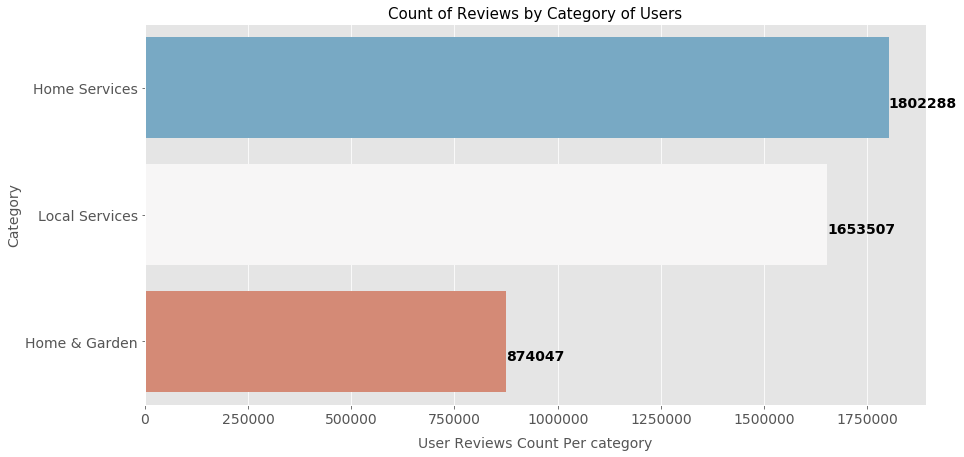

In [79]:
#  Plotting users review_count in different categories
plt.figure(figsize=(14,7))
# Dropping duplicate from reviews to that we don
datacat = df_yelp.groupby('categories')['user_review_count'].sum().sort_values(ascending=False)
sns.barplot(y=datacat.index,x=datacat.values ,palette= sns.color_palette("RdBu_r", len(datacat)))
plt.xlabel('User Reviews Count Per category', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Reviews by Category of Users', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(datacat):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

#  This shows the Users who reviewed in these category have reviews all together.